In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb

%matplotlib inline

# Load Data

In [2]:
train = pd.read_csv('./data/train_clean.csv')
test = pd.read_csv('./data/test_clean.csv')
print('Train:\t', train.shape)
print('Test: \t', test.shape)

Train:	 (307506, 172)
Test: 	 (48744, 171)


In [3]:
# define categorical features
cat_feature = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
               'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
               'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
               'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 
               'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 
               'Binary_CREDIT_DAY_OVERDUE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
               'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
               'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',  
               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
               'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 
               'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
               'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
               'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
               'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
               'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
               'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',  'FLAG_DOCUMENT_20', 
               'FLAG_DOCUMENT_21', ]

dis_feature = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
               'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 
               'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
               'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
               'Total_BUREAU', 'Closed_BUREAU', 'Active_BUREAU', 'Sold_BUREAU', 
               'Bad_BUREAU', 'Count_AMT_CREDIT_MAX_OVERDUE', 'Credit_CREDIT_TYPE', 
               'Loan_CREDIT_TYPE', 'Count_POS_CASH', 'Completed_CASH_CONTRACT', 
               'Other_CASH_CONTRACT', 'Count_Credit_Card', 'Active_Credit_CONTRACT', 
               'Completed_Credit_CONTRACT', 'Other_Credit_CONTRACT', 'Count_installment', 
               'Count_prev', 'Count_prev_Cash_loan', 'Count_prev_Consumer_loan', 
               'Count_prev_Revolving_loan', 'Count_Y_prev_FLAG_LAST_APPL_PER_CONTRACT', 
               'Count_N_prev_FLAG_LAST_APPL_PER_CONTRACT', 'Count_1_prev_NFLAG_LAST_APPL_IN_DAY', 
               'Count_0_prev_NFLAG_LAST_APPL_IN_DAY', 'Count_Approved_prev_NAME_CONTRACT_STATUS', 
               'Count_Canceled_prev_NAME_CONTRACT_STATUS', 'Count_Refused_prev_NAME_CONTRACT_STATUS', 
               'Count_Unused_prev_NAME_CONTRACT_STATUS',  'Count_Cash_prev_NAME_PAYMENT_TYPE',
               'Count_XNA_prev_NAME_PAYMENT_TYPE', 'Count_Noncash_prev_NAME_PAYMENT_TYPE', 
               'Count_Unaccompanied_prev_NAME_TYPE_SUITE', 'Count_Accompanied_prev_NAME_TYPE_SUITE', 
               'Count_Other_NAME_TYPE_SUITE', 'Count_Repeater_prev_NAME_CLIENT_TYPE', 
               'Count_New_prev_NAME_CLIENT_TYPE', 'Count_Refreshed_prev_NAME_CLIENT_TYPE', 
               'Count_POS_prev_NAME_PORTFOLIO', 'Count_Cash_prev_NAME_PORTFOLIO', 
               'Count_Cards_prev_NAME_PORTFOLIO', 'Count_Other_prev_NAME_PORTFOLIO', 
               'Count_XNA_prev_NAME_PRODUCT_TYPE', 'Count_xsell_prev_NAME_PRODUCT_TYPE', 
               'Count_walkin_prev_NAME_PRODUCT_TYPE', 'Count_0_prev_NFLAG_INSURED_ON_APPROVAL', 
               'Count_1_prev_NFLAG_INSURED_ON_APPROVAL']

con_feature = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
               'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
               'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'Sum_CASH_MONTH_BALANCE', 
               'Mean_CASH_MONTH_BALANCE', 'Median_CASH_MONTH_BALANCE', 'Sum_CASH_CNT_INSTALMENT', 
               'Mean_CASH_CNT_INSTALMENT', 'Median_CASH_CNT_INSTALMENT', 
               'Sum_CASH_CNT_INSTALMENT_FUTURE', 'Mean_CASH_CNT_INSTALMENT_FUTURE', 
               'Median_CASH_CNT_INSTALMENT_FUTURE', 'Active_CASH_CONTRACT', 
               'Sum_CASH_SK_DPD', 'Mean_CASH_SK_DPD', 'Median_CASH_SK_DPD', 'Sum_CASH_SK_DPD_DEF', 
               'Mean_CASH_SK_DPD_DEF', 'Median_CASH_SK_DPD_DEF', 'Sum_NUM_INSTALMENT_VERSION', 
               'Mean_NUM_INSTALMENT_VERSION', 'Median_NUM_INSTALMENT_VERSION', 
               'Sum_NUM_INSTALMENT_NUMBER', 'Mean_NUM_INSTALMENT_NUMBER', 
               'Median_NUM_INSTALMENT_NUMBER', 'Sum_DAYS_INSTALMENT', 'Mean_DAYS_INSTALMENT',
               'Median_DAYS_INSTALMENT', 'Sum_DAYS_ENTRY_PAYMENT', 'Mean_DAYS_ENTRY_PAYMENT', 
               'Median_DAYS_ENTRY_PAYMENT', 'Sum_AMT_INSTALMENT', 'Mean_AMT_INSTALMENT', 
               'Median_AMT_INSTALMENT', 'Sum_AMT_PAYMENT', 'Mean_AMT_PAYMENT', 'Median_AMT_PAYMENT',
               'Sum_prev_AMT_ANNUITY', 'Mean_prev_AMT_ANNUITY', 'Median_prev_AMT_ANNUITY', 
               'Sum_prev_AMT_APPLICATION', 'Mean_prev_AMT_APPLICATION', 'Median_prev_AMT_APPLICATION', 
               'Sum_prev_AMT_CREDIT', 'Mean_prev_AMT_CREDIT', 'Median_prev_AMT_CREDIT', 
               'Sum_prev_AMT_DOWN_PAYMENT', 'Sum_prev_AMT_GOODS_PRICE',  'Mean_prev_AMT_GOODS_PRICE', 
               'Median_prev_AMT_GOODS_PRICE', 'Sum_prev_RATE_DOWN_PAYMENT', 'Sum_prev_DAYS_DECISION', 
               'Mean_prev_DAYS_DECISION', 'Median_prev_DAYS_DECISION','Sum_prev_CNT_PAYMENT', 
               'Mean_prev_CNT_PAYMENT', 'Median_prev_CNT_PAYMENT']

features = cat_feature + dis_feature + con_feature

# define numerical and categorical features
print('Categorical:\t', len(cat_feature))
print('Discrete:\t', len(dis_feature))
print('Continuous:\t', len(con_feature))
print('Total:\t\t', len(features))

Categorical:	 49
Discrete:	 55
Continuous:	 66
Total:		 170


# LigthGBM Data Preparation

In [4]:
# encoding categorical data into numerical format
label_encoders = []
for name in cat_feature:
    encoder = LabelEncoder()
    train[name] = encoder.fit_transform(train[name])
    test[name] = encoder.transform(test[name])
    label_encoders.append(encoder)

In [5]:
# create LightGBM dataset
train_x = train[features]
train_y = train['TARGET'].values

gbm_train = lgb.Dataset(data=train_x, label=train_y, feature_name=features, 
                        categorical_feature=cat_feature, free_raw_data=False)

# LightGBM Random Forest

In [8]:
# define parameter space to explore
rf_max_bin_list = [255, 300]
rf_num_leaves_list = [20, 30, 40, 50, 60]
rf_max_depth_list = [-1, 20, 30, 40, 50]
rf_min_data_in_leaf_list = [20, 30, 40, 50]
rf_bagging_frac_list = [0.5, 0.632, 0.7, 0.8]
rf_feature_frac_list = [0.4, 0.5, 0.6, 0.7, 0.8]

rf_max_bin_vals = []
rf_num_leaves_vals = []
rf_max_depth_vals = []
rf_min_data_vals = []
rf_bagging_frac_vals = []
rf_feature_frac_vals = []

rf_mean_auc = []
rf_std_auc = []

In [9]:
# Random search with Cross validation
s = '|{0:>7s} |{1:>10s} |{2:>10s} |{3:>16s} |{4:>16s} |{5:>16s} |{6:>6s} |{7:>6s} |'
print(s.format('max_bin', 'num_leaves', 'max_depth', 'min_data_in_leaf', 
               'bagging_fraction', 'feature_fraction', 'AUC', 'std'))
print('-' * 104)

# perform random search for given number n
n = 30
np.random.seed(42)
visited = set()
for i in range(n):
    while True:
        max_bin = np.random.choice(rf_max_bin_list)
        num_leaves = np.random.choice(rf_num_leaves_list)
        max_depth = np.random.choice(rf_max_depth_list)
        min_data_in_leaf = np.random.choice(rf_min_data_in_leaf_list)
        bagging_fraction = np.random.choice(rf_bagging_frac_list)
        feature_fraction = np.random.choice(rf_feature_frac_list)
        
        tuples = (max_bin, num_leaves, max_depth, min_data_in_leaf, 
                  bagging_fraction, feature_fraction)
        if tuples not in visited:
            visited.add(tuples)
            break
            
    params = {'objective': 'binary', 
              'boosting': 'rf', 
              'num_threads': 4, 
              'is_unbalance': True, 
              'metric': ['auc'],
              'learning_rate': 0.1, 
              'max_bin': max_bin, 
              'num_leaves': num_leaves, 
              'max_depth': max_depth, 
              'min_data_in_leaf': min_data_in_leaf, 
              'bagging_fraction': bagging_fraction, 
              'feature_fraction': feature_fraction, 
              'bagging_freq': 1, 
              'lambda_l1': 0.0,
              'lambda_l2': 0.0,
              'drop_rate': 0.1}

    # 5-folder cross validation (no early stopping)
    history = lgb.cv(params, train_set=gbm_train, nfold=5, num_boost_round=500, 
                     stratified=True, early_stopping_rounds=None, verbose_eval=False, 
                     seed=42, feature_name=features, categorical_feature=cat_feature)

    # get result
    rf_max_bin_vals.append(max_bin)
    rf_num_leaves_vals.append(num_leaves)
    rf_max_depth_vals.append(max_depth)
    rf_min_data_vals.append(min_data_in_leaf)
    rf_bagging_frac_vals.append(bagging_fraction)
    rf_feature_frac_vals.append(feature_fraction)
    rf_mean_auc.append(history['auc-mean'][-1])
    rf_std_auc.append(history['auc-stdv'][-1])
        
    # output the resuts
    ss = '|{0:7d} |{1:10d} |{2:10d} |{3:16d} |{4:16.4f} |{5:16.4f} |{6:6.4f} |{7:6.4f} |'
    print(ss.format(max_bin, num_leaves, max_depth, min_data_in_leaf, bagging_fraction, 
                    feature_fraction, history['auc-mean'][-1], history['auc-stdv'][-1]))
    
# get the best parameters
idx = np.argmax(rf_mean_auc)
print('-' * 104)
print(ss.format(rf_max_bin_vals[idx], rf_num_leaves_vals[idx], rf_max_depth_vals[idx], 
                rf_min_data_vals[idx], rf_bagging_frac_vals[idx], rf_feature_frac_vals[idx], 
                rf_mean_auc[idx], rf_std_auc[idx]))

|max_bin |num_leaves | max_depth |min_data_in_leaf |bagging_fraction |feature_fraction |   AUC |   std |
--------------------------------------------------------------------------------------------------------
|    300 |        30 |        50 |              30 |          0.8000 |          0.5000 |0.7401 |0.0039 |
|    300 |        50 |        30 |              20 |          0.6320 |          0.5000 |0.7453 |0.0039 |
|    255 |        60 |        -1 |              50 |          0.7000 |          0.6000 |0.7433 |0.0039 |
|    300 |        20 |        -1 |              30 |          0.7000 |          0.5000 |0.7366 |0.0038 |
|    300 |        40 |        40 |              30 |          0.6320 |          0.7000 |0.7369 |0.0038 |
|    255 |        50 |        30 |              30 |          0.6320 |          0.4000 |0.7464 |0.0040 |
|    300 |        40 |        40 |              40 |          0.5000 |          0.4000 |0.7453 |0.0040 |
|    255 |        30 |        50 |              50 |   

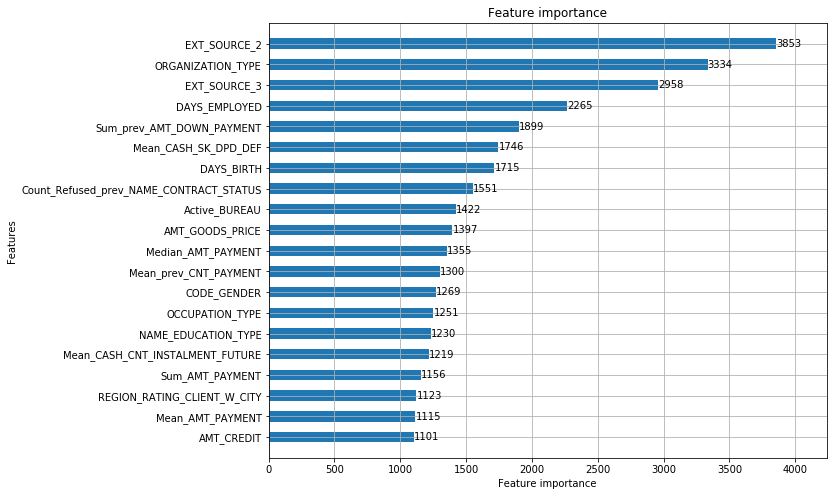

In [11]:
# define best parameters
params = {'objective': 'binary', 
          'boosting': 'rf', 
          'num_threads': 4, 
          'is_unbalance': True, 
          'metric': ['auc'],
          'learning_rate': 0.1, 
          'max_bin': 255, 
          'num_leaves': 60, 
          'max_depth': -1, 
          'min_data_in_leaf': 30, 
          'bagging_fraction': 0.7, 
          'feature_fraction': 0.4, 
          'bagging_freq': 1, 
          'lambda_l1': 0.0,
          'lambda_l2': 0.0,
          'drop_rate': 0.1}

# re-train the model and make predictions
rf = lgb.train(params, train_set=gbm_train, num_boost_round=1000, 
               feature_name=features, categorical_feature=cat_feature)
rf_test_pred = rf.predict(test[features])

# feature importance
importance = rf.feature_importance()

fig, ax = plt.subplots(figsize=(10, 8))
lgb.plot_importance(rf, ax=ax, height=0.5, max_num_features=20)
plt.show()

In [20]:
# get feature importance details
rf_importance = pd.DataFrame({'feature': features, 'importance': importance}, 
                             columns=['feature', 'importance'])
rf_importance = rf_importance.sort_values(by='importance', ascending=False)
rf_importance

,feature,importance
113,EXT_SOURCE_2,3853
11,ORGANIZATION_TYPE,3334
114,EXT_SOURCE_3,2958
110,DAYS_EMPLOYED,2265
159,Sum_prev_AMT_DOWN_PAYMENT,1899
130,Mean_CASH_SK_DPD_DEF,1746
109,DAYS_BIRTH,1715
84,Count_Refused_prev_NAME_CONTRACT_STATUS,1551
60,Active_BUREAU,1422
107,AMT_GOODS_PRICE,1397


In [21]:
# make prediction files
test_id = test['SK_ID_CURR'].values
test_pred = rf_test_pred

rf_csv = pd.DataFrame({'SK_ID_CURR': test_id, 'TARGET': test_pred}, 
                       columns=['SK_ID_CURR', 'TARGET'])
rf_csv.to_csv('./result/all_feature_lightGBM_random_forest_balanced.csv', index=False)

# LightGBM Boosting

In [25]:
# define parameter space to explore
gbm_learning_rate_list = [0.001, 0.01, 0.1]
gbm_max_bin_list = [255, 400]
gbm_num_leaves_list = [20, 30, 40, 50, 60]
gbm_max_depth_list = [-1, 20, 30, 40, 50]
gbm_min_data_in_leaf_list = [20, 30, 40, 50]

gbm_learning_rate_vals = []
gbm_max_bin_vals = []
gbm_num_leaves_vals = []
gbm_max_depth_vals = []
gbm_min_data_vals = []

gbm_best_rounds = []
gbm_mean_auc = []
gbm_std_auc = []

In [26]:
# Random search with Cross validation
s = '|{0:>13s} |{1:>7s} |{2:>10s} |{3:>10s} |{4:>16s} | {5:>12s}| {6:>6s} |{7:>6s} |'
print(s.format('learning_rate', 'max_bin', 'num_leaves', 'max_depth', 
               'min_data_in_leaf', 'best_rounds', 'AUC', 'std'))
print('-' * 98)

# perform random search for given number n
n = 30
np.random.seed(42)
visited = set()
for i in range(n):
    while True:
        learning_rate = np.random.choice(gbm_learning_rate_list)
        max_bin = np.random.choice(gbm_max_bin_list)
        num_leaves = np.random.choice(gbm_num_leaves_list)
        max_depth = np.random.choice(gbm_max_depth_list)
        min_data_in_leaf = np.random.choice(gbm_min_data_in_leaf_list)
        
        tuples = (learning_rate, max_bin, num_leaves, max_depth, min_data_in_leaf)
        if tuples not in visited:
            visited.add(tuples)
            break
            
    params = {'objective': 'binary', 
              'boosting': 'gbdt', 
              'num_threads': 4, 
              'is_unbalance': True, 
              'metric': ['auc'],
              'learning_rate': learning_rate, 
              'max_bin': max_bin, 
              'num_leaves': num_leaves, 
              'max_depth': max_depth, 
              'min_data_in_leaf': min_data_in_leaf, 
              'bagging_fraction': 1.0, 
              'feature_fraction': 1.0, 
              'bagging_freq': 0, 
              'lambda_l1': 0.0,
              'lambda_l2': 0.0,
              'drop_rate': 0.1}

    # 5-folder cross validation (no early stopping)
    history = lgb.cv(params, train_set=gbm_train, nfold=5, num_boost_round=1000, 
                     stratified=True,  early_stopping_rounds=30, verbose_eval=False, 
                     seed=42, feature_name=features, categorical_feature=cat_feature)

    # get result
    gbm_learning_rate_vals.append(learning_rate)
    gbm_max_bin_vals.append(max_bin)
    gbm_num_leaves_vals.append(num_leaves)
    gbm_max_depth_vals.append(max_depth)
    gbm_min_data_vals.append(min_data_in_leaf)
    gbm_best_rounds.append(len(history['auc-mean']))
    gbm_mean_auc.append(history['auc-mean'][-1])
    gbm_std_auc.append(history['auc-stdv'][-1])
        
    # output the resuts
    ss = '|{0:>13.5f} |{1:>7d} |{2:>10d} |{3:>10d} |{4:>16d} | {5:>12d}| {6:>6.4f} |{7:>6.4f} |'
    print(ss.format(learning_rate, max_bin, num_leaves, max_depth, min_data_in_leaf, 
                    len(history['auc-mean']), history['auc-mean'][-1], history['auc-stdv'][-1]))
    
# get the best parameters
idx = np.argmax(gbm_mean_auc)
print('-' * 104)
print(ss.format(gbm_learning_rate_vals[idx], gbm_max_bin_vals[idx], gbm_num_leaves_vals[idx], 
                gbm_max_depth_vals[idx], gbm_min_data_vals[idx], gbm_best_rounds[idx], 
                gbm_mean_auc[idx], gbm_std_auc[idx]))

|learning_rate |max_bin |num_leaves | max_depth |min_data_in_leaf |  best_rounds|    AUC |   std |
--------------------------------------------------------------------------------------------------
|      0.10000 |    255 |        40 |        -1 |              40 |          111| 0.7658 |0.0031 |
|      0.00100 |    255 |        20 |        20 |              30 |         1000| 0.7373 |0.0032 |
|      0.00100 |    400 |        60 |        20 |              20 |         1000| 0.7449 |0.0036 |
|      0.10000 |    400 |        40 |        30 |              50 |          136| 0.7663 |0.0030 |
|      0.10000 |    400 |        50 |        30 |              30 |          110| 0.7657 |0.0027 |
|      0.00100 |    255 |        50 |        20 |              40 |         1000| 0.7439 |0.0035 |
|      0.00100 |    400 |        40 |        50 |              30 |         1000| 0.7426 |0.0034 |
|      0.10000 |    255 |        20 |        40 |              50 |          199| 0.7680 |0.0030 |
|      0.1

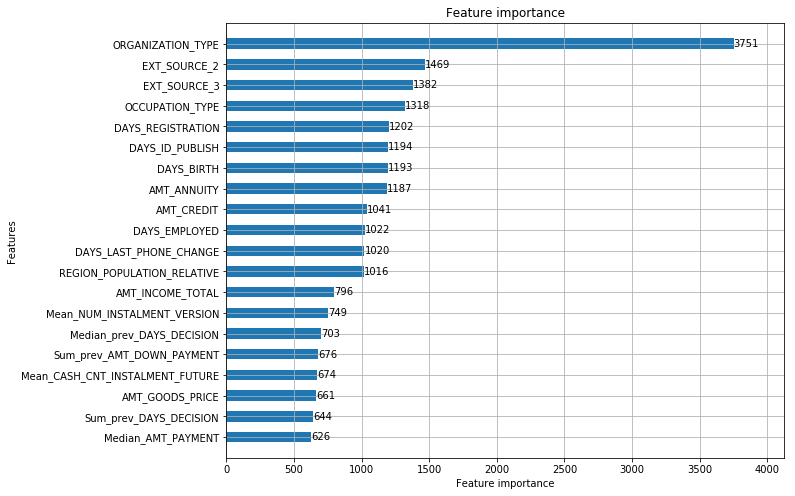

In [30]:
# define best parameters
params = {'objective': 'binary', 
          'boosting': 'gbdt', 
          'num_threads': 4, 
          'is_unbalance': True, 
          'metric': ['auc'],
          'learning_rate': 0.1, 
          'max_bin': 255, 
          'num_leaves': 50, 
          'max_depth': -1, 
          'min_data_in_leaf': 40, 
          'bagging_fraction': 1.0, 
          'feature_fraction': 1.0,
          'bagging_freq': 0,
          'lambda_l1': 0.0,
          'lambda_l2': 0.0,
          'drop_rate': 0.1}

# re-train the model and make predictions
gbm = lgb.train(params, train_set=gbm_train, num_boost_round=997, 
                feature_name=features, categorical_feature=cat_feature)
gbm_test_pred = gbm.predict(test[features])

# feature importance
importance = gbm.feature_importance()

fig, ax = plt.subplots(figsize=(10, 8))
lgb.plot_importance(gbm, ax=ax, height=0.5, max_num_features=20)
plt.show()

In [31]:
# get feature importance details
gbm_importance = pd.DataFrame({'feature': features, 'importance': importance}, 
                             columns=['feature', 'importance'])
gbm_importance = gbm_importance.sort_values(by='importance', ascending=False)
gbm_importance

,feature,importance
11,ORGANIZATION_TYPE,3751
113,EXT_SOURCE_2,1469
114,EXT_SOURCE_3,1382
9,OCCUPATION_TYPE,1318
111,DAYS_REGISTRATION,1202
112,DAYS_ID_PUBLISH,1194
109,DAYS_BIRTH,1193
106,AMT_ANNUITY,1187
105,AMT_CREDIT,1041
110,DAYS_EMPLOYED,1022


In [32]:
# make prediction files
test_id = test['SK_ID_CURR'].values
test_pred = gbm_test_pred

gbm_csv = pd.DataFrame({'SK_ID_CURR': test_id, 'TARGET': test_pred}, 
                       columns=['SK_ID_CURR', 'TARGET'])
gbm_csv.to_csv('./result/all_feature_lightGBM_boosting_balanced.csv', index=False)